# Preprocessing

## Import Dataset

In [289]:
import pandas as pd
import numpy as np

In [290]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Andrew
[nltk_data]     Nugrah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [291]:
df = pd.read_csv('./tweets_PDIP.csv')

In [292]:
df.head()

,Unnamed: 0,Date,User,tweet,Link Tweet
0,0,2023-03-22 22:44:19+00:00,moreshare,"Heran, #PDIP Kok Setuju Gerakan Tolak Timnas I...",https://twitter.com/moreshare/status/163867298...
1,1,2023-03-22 20:31:28+00:00,TheUncleDee,Inilah Bentuk ketidakmampuan serta Ketakutan #...,https://twitter.com/TheUncleDee/status/1638639...
2,2,2023-03-22 15:18:20+00:00,CelahId,PDI Perjuangan Jawa Timur tegas menolak kedata...,https://twitter.com/CelahId/status/16385607482...
3,3,2023-03-22 15:10:01+00:00,MilenialSamaAH,Pertemuan Golkar dan Partai Bulan Bintang\r\n\...,https://twitter.com/MilenialSamaAH/status/1638...
4,4,2023-03-22 01:25:20+00:00,fajaronline,"Singgung Mahfud MD, Legislator PDIP Beber Anca...",https://twitter.com/fajaronline/status/1638351...


## Case Folding
Case folding ini merupakan salah satu tahap pada pre-processing untuk mengubah semua huruf besar atau huruf kapital yang terdapat di teks menjadi huruf kecil.

In [293]:
df['tweet'] = df['tweet'].str.lower()

In [294]:
df['tweet'].head()

0    heran, #pdip kok setuju gerakan tolak timnas i...
1    inilah bentuk ketidakmampuan serta ketakutan #...
2    pdi perjuangan jawa timur tegas menolak kedata...
3    pertemuan golkar dan partai bulan bintang\r\n\...
4    singgung mahfud md, legislator pdip beber anca...
Name: tweet, dtype: object

## Special Characters
Pada bagian Pre-processing ini yang dilakukan adalah menghilangkan karakter tertentu secara spesifik seperti tab, baris baru, <i>backslash</i>('\\'), dan karakter non-ASCII. Untuk karakter non-ASCII ditangai menggunakan metode encode dan decode. Menghapus <i>mention</i>('@user'), link url, dan tagar dengan menggunakan <i>REGEX</i>. Kemudian menggantikan URL yang tidak lengkap dengan spasi. <i>REGEX</i> juga digunakan untuk menangani digit numerik dari teks, mengubah <i>multiple whitespace</i> menjadi satu <i>whitespace</i> saja, dan yang terakhir digunakan untuk menghapus kata berkarakter tunggal (misalnya, "a," "I"). 

In [295]:
import string
import re #untuk regular expression

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [296]:
#remove unnneccesary characters
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [297]:
df['tweet'] = df['tweet'].apply(remove_tweet_special)
df['tweet'] = df['tweet'].apply(remove_number)
df['tweet'] = df['tweet'].apply(remove_punctuation)
df['tweet'] = df['tweet'].apply(remove_whitespace_LT)
df['tweet'] = df['tweet'].apply(remove_whitespace_multiple)
df['tweet'] = df['tweet'].apply(remove_singl_char)
df = df[~df['tweet'].duplicated(keep='first')]
df = df[df['tweet'].notna()]
df.dropna(subset=['tweet'], inplace=True)

## Tokenizing
Kemudian setelah dilakukannya pre-processing, dilakukan tokenisasi terhadap data tweet tersebut. Tokenisasi dilakukan dengan menggunakan fungsi <i>word_tokenize_wrapper</i> yang telah didefine sebelumnya. Kemudian tweet yang telah ditokenisasi tersebut dimuat ke kolom baru bernama <i>tokenized_tweet</i>. Fungsi <i>word_tokenize_wrapper</i> menggunakan fungsi <i>word_tokenize</i> dari <b>NLTK</b>.

In [298]:
df['tokenized_tweet'] = df['tweet'].apply(word_tokenize_wrapper)

In [299]:
df[['tweet','tokenized_tweet']].head()

,tweet,tokenized_tweet
0,heran kok setuju gerakan tolak timnas israel,"[heran, kok, setuju, gerakan, tolak, timnas, i..."
1,inilah bentuk ketidakmampuan serta ketakutan f...,"[inilah, bentuk, ketidakmampuan, serta, ketaku..."
2,pdi perjuangan jawa timur tegas menolak kedata...,"[pdi, perjuangan, jawa, timur, tegas, menolak,..."
3,pertemuan golkar dan partai bulan bintang,"[pertemuan, golkar, dan, partai, bulan, bintang]"
4,singgung mahfud md legislator pdip beber ancam...,"[singgung, mahfud, md, legislator, pdip, beber..."


## Slang Removal & Stopword Removal
Pada bagian ini, pre-processing dilanjutkan dengan mengubah kata-kata yang tadinya berupa slang atau non-baku menjadi kata-kata yang lebih formal dan lebih umum digunakan. Untuk <i>dictionary</i> yang mengandung slang tersebut, saya peroleh dari <a>https://github.com/nasalsabila/kamus-alay/tree/master</a>. Kemudian dilanjutkan dengan menghilangkan <i>stopwords</i>. Untuk <i>corpus</i> dari <i>stopwords</i> ini saya peroleh dari <a>https://github.com/pebbie/pebahasa/blob/master/indonesian</a> dan <a>https://github.com/aliakbars/bilp/blob/master/stoplist</a>. Corpus tersebut kemudian saya hanya mengambil kata-kata yang unik yang artinya masing-masing kata frekuensinya hanya satu di dalam <i>corpus</i> tersebut kemudian saya satukan ke dalam satu file.

In [300]:
tweet_data = df[['tweet', 'tokenized_tweet']]

In [301]:
tweet_data.head()

,tweet,tokenized_tweet
0,heran kok setuju gerakan tolak timnas israel,"[heran, kok, setuju, gerakan, tolak, timnas, i..."
1,inilah bentuk ketidakmampuan serta ketakutan f...,"[inilah, bentuk, ketidakmampuan, serta, ketaku..."
2,pdi perjuangan jawa timur tegas menolak kedata...,"[pdi, perjuangan, jawa, timur, tegas, menolak,..."
3,pertemuan golkar dan partai bulan bintang,"[pertemuan, golkar, dan, partai, bulan, bintang]"
4,singgung mahfud md legislator pdip beber ancam...,"[singgung, mahfud, md, legislator, pdip, beber..."


In [302]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopword indonesia from NTLK library
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# stopword from file
# File didapat dari link : 
# https://github.com/pebbie/pebahasa/blob/master/indonesian
# https://github.com/aliakbars/bilp/blob/master/stoplist
txt_stopword = pd.read_csv("./stopwords_indo.txt", names= ["stopwords"], header = None)

# add stopword from file to list_stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Andrew
[nltk_data]     Nugrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [303]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [304]:
# mengganti kata non formal ke kata standar baku
# list slang dapat dari : https://github.com/nasalsabila/kamus-alay/tree/master

kamusalay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

In [305]:
kamusalay[['slang', 'formal']].head()

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [306]:
katabaku_dict = {}

for index, row in kamusalay.iterrows():
    if row[0] not in katabaku_dict:
        katabaku_dict[row[0]] = row[1]

def normalized_term(document):
    return [katabaku_dict[term] if term in katabaku_dict else term for term in document]


In [307]:
tweet_data['baku_tweet'] = tweet_data['tokenized_tweet'].apply(normalized_term)

C:\Users\Andrew Nugrah\AppData\Local\Temp\ipykernel_17828\164542108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['baku_tweet'] = tweet_data['tokenized_tweet'].apply(normalized_term)


In [308]:
tweet_data['stopword_applied'] = tweet_data['baku_tweet'].apply(stopwords_removal)

C:\Users\Andrew Nugrah\AppData\Local\Temp\ipykernel_17828\3093010382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['stopword_applied'] = tweet_data['baku_tweet'].apply(stopwords_removal)


In [309]:
tweet_data[['tokenized_tweet', 'baku_tweet', 'stopword_applied']].head()

,tokenized_tweet,baku_tweet,stopword_applied
0,"[heran, kok, setuju, gerakan, tolak, timnas, i...","[heran, kok, setuju, gerakan, tolak, timnas, i...","[heran, setuju, gerakan, tolak, timnas, israel]"
1,"[inilah, bentuk, ketidakmampuan, serta, ketaku...","[inilah, bentuk, ketidakmampuan, serta, ketaku...","[bentuk, ketidakmampuan, ketakutan, fight, kor..."
2,"[pdi, perjuangan, jawa, timur, tegas, menolak,...","[pdi, perjuangan, jawa, timur, tegas, menolak,...","[pdi, perjuangan, jawa, timur, menolak, kedata..."
3,"[pertemuan, golkar, dan, partai, bulan, bintang]","[pertemuan, golkar, dan, partai, bulan, bintang]","[pertemuan, golkar, partai, bintang]"
4,"[singgung, mahfud, md, legislator, pdip, beber...","[singgung, mahfud, md, legislator, pdip, beber...","[singgung, mahfud, md, legislator, pdip, beber..."


## Stemming
Menggunakan stemmer dari <B>Sastrawi</B> untuk melakukan stemming. Prosesnya meliputi inisialisasi stemmer, membuat <i>dictionary</i> yang berisikan istilah-istilah unik dari data tahap pre-processing sebelumnya, kemudian dilanjutkan dengan melakukan stemming terhadap istilah-istilah tersebut, dan kemudian menerapkan stemming tersebut untuk membuat kolom baru bernama 'stemmed_tweet'.

In [310]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet_data['baku_tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '



for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet_data.loc[:, 'stemmed_tweet'] = tweet_data['baku_tweet'].swifter.apply(get_stemmed_term)

Pandas Apply: 100%|██████████| 26783/26783 [00:00<00:00, 367356.16it/s]
C:\Users\Andrew Nugrah\AppData\Local\Temp\ipykernel_17828\2244820307.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data.loc[:, 'stemmed_tweet'] = tweet_data['baku_tweet'].swifter.apply(get_stemmed_term)


In [311]:
tweet_data['stemmed_tweet'].head()

0      [heran, kok, tuju, gera, tolak, timnas, israel]
1    [ini, bentuk, ketidakmampuan, serta, takut, fi...
2    [pdi, juang, jawa, timur, tegas, tolak, datang...
3          [temu, golkar, dan, partai, bulan, bintang]
4    [singgung, mahfud, md, legislator, pdip, beber...
Name: stemmed_tweet, dtype: object

In [312]:
# save dataset sementara
tweet_data.to_csv("./Text_Preprocessing_notinclude_tfidf_copy.csv")

## TF-IDF
referensi tf-idf : https://medium.com/@yunusmuhammad007/tf-idf-term-frequency-inverse-document-frequency-representasi-vector-data-text-2a4eff56cda

In [313]:
df = pd.read_csv("./Text_Preprocessing_notinclude_tfidf_copy.csv")

In [314]:
df.head()

,Unnamed: 0,tweet,tokenized_tweet,baku_tweet,stopword_applied,stemmed_tweet
0,0,heran kok setuju gerakan tolak timnas israel,"['heran', 'kok', 'setuju', 'gerakan', 'tolak',...","['heran', 'kok', 'setuju', 'gerakan', 'tolak',...","['heran', 'setuju', 'gerakan', 'tolak', 'timna...","['heran', 'kok', 'tuju', 'gera', 'tolak', 'tim..."
1,1,inilah bentuk ketidakmampuan serta ketakutan f...,"['inilah', 'bentuk', 'ketidakmampuan', 'serta'...","['inilah', 'bentuk', 'ketidakmampuan', 'serta'...","['bentuk', 'ketidakmampuan', 'ketakutan', 'fig...","['ini', 'bentuk', 'ketidakmampuan', 'serta', '..."
2,2,pdi perjuangan jawa timur tegas menolak kedata...,"['pdi', 'perjuangan', 'jawa', 'timur', 'tegas'...","['pdi', 'perjuangan', 'jawa', 'timur', 'tegas'...","['pdi', 'perjuangan', 'jawa', 'timur', 'menola...","['pdi', 'juang', 'jawa', 'timur', 'tegas', 'to..."
3,3,pertemuan golkar dan partai bulan bintang,"['pertemuan', 'golkar', 'dan', 'partai', 'bula...","['pertemuan', 'golkar', 'dan', 'partai', 'bula...","['pertemuan', 'golkar', 'partai', 'bintang']","['temu', 'golkar', 'dan', 'partai', 'bulan', '..."
4,4,singgung mahfud md legislator pdip beber ancam...,"['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd..."


In [315]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df['tweet_list'] = df['stemmed_tweet'].apply(convert_text_list)

### Calculate Term Frequency(TF)
Pada tahap ini dilakukan perhitungan frekuensi tiap istilah dengan menggunakan fungsi <b><i>calc_TF</i></b> di bawah ini untuk setiap istilah(<i>Term</i>) dalam <b><i>document</i></b>.

In [316]:
def calc_TF(document):
    # Counts the number of times the word appears in the document
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes TF for each term
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict


In [317]:
df["TF_dict"] = df['tweet_list'].apply(calc_TF)

df["TF_dict"].head()
df["TF_dict"]

0        {'heran': 0.14285714285714285, 'kok': 0.142857...
1        {'ini': 0.06666666666666667, 'bentuk': 0.06666...
2        {'pdi': 0.05263157894736842, 'juang': 0.052631...
3        {'temu': 0.16666666666666666, 'golkar': 0.1666...
4        {'singgung': 0.08333333333333333, 'mahfud': 0....
                               ...                        
26778    {'ini': 0.16666666666666666, 'tahapantahapan':...
26779    {'yakin': 0.1111111111111111, 'abang': 0.11111...
26780    {'pilih': 0.05, 'umum': 0.05, 'di': 0.05, 'dep...
26781    {'partai': 0.058823529411764705, 'yang': 0.058...
26782    {'ayo': 0.25, 'pilih': 0.25, 'untuk': 0.25, 'i...
Name: TF_dict, Length: 26783, dtype: object

### Calculate Document Frequency(DF)
Tahap ini menghitung Frekuensi dari <b><i>document</i></b> untuk setiap <b><i>term</i></b> yang terdapat dalam kumpulan <b><i>document</i></b>. Hasilnya adalah ukuran berapa banyak <b><i>document</i></b> yang mengandung <b><i>term</i></b> tertentu. 

In [318]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF


In [319]:
DFresult = calc_DF(df["TF_dict"])

### Calculate Inverse Document Frequency(IDF)
Pada tahap ini dilakukan perhitungan Inverse Document Frequecy (IDF) untuk setiap <b><i>term</i></b> berdasarkan nilai frekuensi <b><i>document</i></b> yang telah dihitung sebelumnya. IDF dapat digunakan sebagai pengukuran yang membantu menilai signifikansi suatu istilah dalam kumpulan dokumen.

In [320]:
# calc idf
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict


In [321]:
#Stores the idf dictionary
IDFresult = calc_IDF(n_document, DFresult)

### Calculate TF-IDF(Term Frequency-Inverse Document Frequency)
Melakukan perhitungan TF-IDF untuk setiap <b><i>term</i></b>, memberikan representasi numerik tentang seberapa signifikan setiap istilah dalam konteks setiap tweet.

In [322]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDFresult[key]
    return TF_IDF_Dict


In [323]:
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [324]:
new_positive_word = pd.read_csv('./unique_positive.txt')
new_negative_word = pd.read_csv('./unique_negative.txt')
kata_positive = new_positive_word['ahli'].tolist()
kata_negative = new_negative_word['inkonsisten'].tolist()

In [325]:
# calc tf-idf total for positive word
def calc_positive(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_positive:
      total = total + TF_IDF_Dict[key]

  return total

### Assign Labels
Melakukan pelabelan sentimen pada <b><i>DataFrame</i></b> yang berisi <i>tweet</i> dengan menghitung total skor <b>TF-IDF</b> untuk kata-kata positif dan negatif. <i>Corpus</i> untuk kata-kata positif dan negatif diperoleh dari <a>https://github.com/masdevid/ID-OpinionWords/</a>.

In [326]:
# calc tf-idf total for negative word
def calc_negative(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_negative:
      total = total + TF_IDF_Dict[key]

  return total

In [327]:
df["TF-IDF_positive"] = df["TF-IDF_dict"].apply(calc_positive)
df["TF-IDF_negative"] = df["TF-IDF_dict"].apply(calc_negative)

Berdasarkan total TF-IDF yang telah dikalkulasikan untuk kata-kata positif dan negatif, kemudian ditentukan kondisi dan pemberian label sentimen. Pelabelan dilakukan dengan kondisi :
* apabila nilai positifnya lebih besar, maka akan dilabeli <b><i>positive</i></b>
* apabila nilai negatifnya lebih besar, maka akan dilabeli <b><i>negative</i></b>
* apabila nilai positif dan negatif sama besarnya, maka akan dilabeli <b><i>neutral</i></b>

In [328]:
conditions = [
    (df['TF-IDF_positive'] < df['TF-IDF_negative']),
    (df['TF-IDF_positive'] > df['TF-IDF_negative']),
    (df['TF-IDF_positive'] == df['TF-IDF_negative'])]
choices = ['negative','positive','neutral']

df['status'] = np.select(conditions, choices)

In [329]:
df.head()
df

,Unnamed: 0,tweet,tokenized_tweet,baku_tweet,stopword_applied,stemmed_tweet,tweet_list,TF_dict,TF-IDF_dict,TF-IDF_positive,TF-IDF_negative,status
0,0,heran kok setuju gerakan tolak timnas israel,"['heran', 'kok', 'setuju', 'gerakan', 'tolak',...","['heran', 'kok', 'setuju', 'gerakan', 'tolak',...","['heran', 'setuju', 'gerakan', 'tolak', 'timna...","['heran', 'kok', 'tuju', 'gera', 'tolak', 'tim...","[heran, kok, tuju, gera, tolak, timnas, israel]","{'heran': 0.14285714285714285, 'kok': 0.142857...","{'heran': 0.8537164188133257, 'kok': 0.6654554...",0.853716,0.665455,positive
1,1,inilah bentuk ketidakmampuan serta ketakutan f...,"['inilah', 'bentuk', 'ketidakmampuan', 'serta'...","['inilah', 'bentuk', 'ketidakmampuan', 'serta'...","['bentuk', 'ketidakmampuan', 'ketakutan', 'fig...","['ini', 'bentuk', 'ketidakmampuan', 'serta', '...","[ini, bentuk, ketidakmampuan, serta, takut, fi...","{'ini': 0.06666666666666667, 'bentuk': 0.06666...","{'ini': 0.15628337598396688, 'bentuk': 0.34011...",1.426370,1.087104,positive
2,2,pdi perjuangan jawa timur tegas menolak kedata...,"['pdi', 'perjuangan', 'jawa', 'timur', 'tegas'...","['pdi', 'perjuangan', 'jawa', 'timur', 'tegas'...","['pdi', 'perjuangan', 'jawa', 'timur', 'menola...","['pdi', 'juang', 'jawa', 'timur', 'tegas', 'to...","[pdi, juang, jawa, timur, tegas, tolak, datang...","{'pdi': 0.05263157894736842, 'juang': 0.052631...","{'pdi': 0.16513814207671212, 'juang': 0.128611...",1.748422,0.128611,positive
3,3,pertemuan golkar dan partai bulan bintang,"['pertemuan', 'golkar', 'dan', 'partai', 'bula...","['pertemuan', 'golkar', 'dan', 'partai', 'bula...","['pertemuan', 'golkar', 'partai', 'bintang']","['temu', 'golkar', 'dan', 'partai', 'bulan', '...","[temu, golkar, dan, partai, bulan, bintang]","{'temu': 0.16666666666666666, 'golkar': 0.1666...","{'temu': 0.677382691231041, 'golkar': 0.737866...",1.138038,1.210529,negative
4,4,singgung mahfud md legislator pdip beber ancam...,"['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","[singgung, mahfud, md, legislator, pdip, beber...","{'singgung': 0.08333333333333333, 'mahfud': 0....","{'singgung': 0.4542158757088447, 'mahfud': 0.5...",0.000000,1.914022,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
26778,40795,ini tahapantahapan pemungutan suara di tps,"['ini', 'tahapantahapan', 'pemungutan', 'suara...","['ini', 'tahapantahapan', 'pemungutan', 'suara...","['tahapantahapan', 'pemungutan', 'suara', 'tps']","['ini', 'tahapantahapan', 'mungut', 'suara', '...","[ini, tahapantahapan, mungut, suara, di, tps]","{'ini': 0.16666666666666666, 'tahapantahapan':...","{'ini': 0.3907084399599172, 'tahapantahapan': ...",0.907770,0.000000,positive
26779,40796,yakin abang moncong putih amp setan merah unit...,"['yakin', 'abang', 'moncong', 'putih', 'amp', ...","['yakin', 'abang', 'moncong', 'putih', 'amp', ...","['abang', 'moncong', 'putih', 'setan', 'merah'...","['yakin', 'abang', 'moncong', 'putih', 'amp', ...","[yakin, abang, moncong, putih, amp, setan, mer...","{'yakin': 0.1111111111111111, 'abang': 0.11111...","{'yakin': 0.5463786641820966, 'abang': 0.85673...",0.919154,1.360417,negative
26780,40797,pemilihan umum di dpn mata masa depan bangsa t...,"['pemilihan', 'umum', 'di', 'dpn', 'mata', 'ma...","['pemilihan', 'umum', 'di', 'depan', 'mata', '...","['pemilihan', 'mata', 'bangsa', 'ditentukan', ...","['pilih', 'umum', 'di', 'depan', 'mata', 'masa...","[pilih, umum, di, depan, mata, masa, depan, ba...","{'pilih': 0.05, 'umum': 0.05, 'di': 0.05, 'dep...","{'pilih': 0.17732690434223053, 'umum': 0.18265...",1.052741,0.971055,positive
26781,40798,partai yg ideologis nya stabil dari dulu sampe...,"['partai', 'yg', 'ideologis', 'nya', 'stabil',...","['partai', 'yang', 'ideologis', 'nya', 'stabil...","['partai', 'ideologis', 'stabil', 'capres', 'j...","['partai', 'yang', 'ideologis', 'nya'

<Axes: xlabel='status', ylabel='count'>

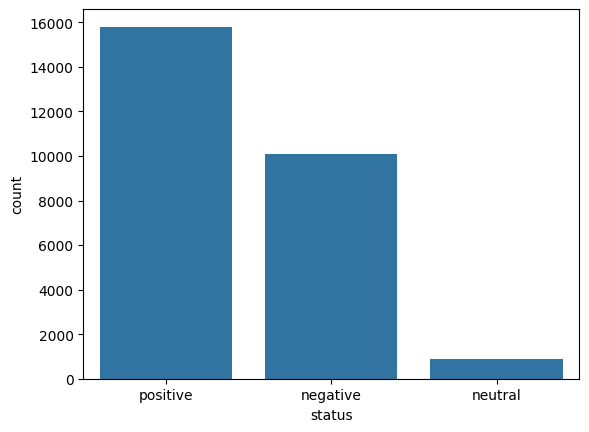

In [330]:
import seaborn as sns
sns.countplot(data =df, x = "status")

In [331]:
df.to_csv("./Text_Preprocessing_complete_copy.csv")

# Feature Extraction
Feature Extraction ini menggunakan <b><i>TfidfVectorizer</i></b> dari library <b><i>scikit-learn</i></b> untuk mengubah kumpulan data teks menjadi matriks <b>TF-IDF</b>.

In [332]:
df = pd.read_csv("./Text_Preprocessing_complete_copy.csv")

In [333]:
df.dropna(subset=['tweet'], inplace=True)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26782 entries, 0 to 26782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      26782 non-null  int64  
 1   Unnamed: 0        26782 non-null  int64  
 2   tweet             26782 non-null  object 
 3   tokenized_tweet   26782 non-null  object 
 4   baku_tweet        26782 non-null  object 
 5   stopword_applied  26782 non-null  object 
 6   stemmed_tweet     26782 non-null  object 
 7   tweet_list        26782 non-null  object 
 8   TF_dict           26782 non-null  object 
 9   TF-IDF_dict       26782 non-null  object 
 10  TF-IDF_positive   26782 non-null  float64
 11  TF-IDF_negative   26782 non-null  float64
 12  status            26782 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


In [335]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
tweet               0
tokenized_tweet     0
baku_tweet          0
stopword_applied    0
stemmed_tweet       0
tweet_list          0
TF_dict             0
TF-IDF_dict         0
TF-IDF_positive     0
TF-IDF_negative     0
status              0
dtype: int64

In [336]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(feature):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(feature)
    return vector

In [337]:
df.iloc[:, 2]

0             heran kok setuju gerakan tolak timnas israel
1        inilah bentuk ketidakmampuan serta ketakutan f...
2        pdi perjuangan jawa timur tegas menolak kedata...
3                pertemuan golkar dan partai bulan bintang
4        singgung mahfud md legislator pdip beber ancam...
                               ...                        
26778           ini tahapantahapan pemungutan suara di tps
26779    yakin abang moncong putih amp setan merah unit...
26780    pemilihan umum di dpn mata masa depan bangsa t...
26781    partai yg ideologis nya stabil dari dulu sampe...
26782                          ayo memilih untuk indonesia
Name: tweet, Length: 26782, dtype: object

In [338]:
tf_vector = get_feature_vector(np.array(df.iloc[:, 6]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 6]).ravel())
y = np.array(df.iloc[:, 12]).ravel()

# Split Dataset
Split dataset yang dilakukan berupa <b>90% Data Train</b> dan <b>10% Data Test</b>

In [339]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [340]:
df.status.value_counts()

status
positive    15804
negative    10085
neutral       893
Name: count, dtype: int64

# Implementasi Model

## Logistic Regression

In [341]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

### Inisiasi Model

In [342]:
modelLR = LogisticRegression(max_iter=10000)

### Train Model

In [344]:
modelLR.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

### K-Cross Validation

In [ ]:
scoreLR = cross_val_score(modelLR, X, y, cv=20)

In [343]:
print(scoreLR)
print(np.mean(scoreLR))
print(np.max(scoreLR))

[0.86044776 0.85       0.85884989 0.84092606 0.85138163 0.83868559
 0.86407767 0.85511576 0.84914115 0.85511576 0.82524272 0.83644511
 0.83943241 0.83196415 0.83271098 0.84839432 0.84615385 0.86557132
 0.87752054 0.8476475 ]
0.8487412080746382
0.8775205377147125


### Prediction and Classification Report

In [345]:
y_predLR_init = modelLR.predict(x_test)

In [346]:
print(confusion_matrix(y_test,y_predLR_init),"\n")
print(classification_report(y_test,y_predLR_init))

[[ 841    1  195]
 [  28    6   46]
 [  94    0 1468]] 

              precision    recall  f1-score   support

    negative       0.87      0.81      0.84      1037
     neutral       0.86      0.07      0.14        80
    positive       0.86      0.94      0.90      1562

    accuracy                           0.86      2679
   macro avg       0.86      0.61      0.63      2679
weighted avg       0.86      0.86      0.85      2679



### Confusion Matrix & Learning Curve Plot

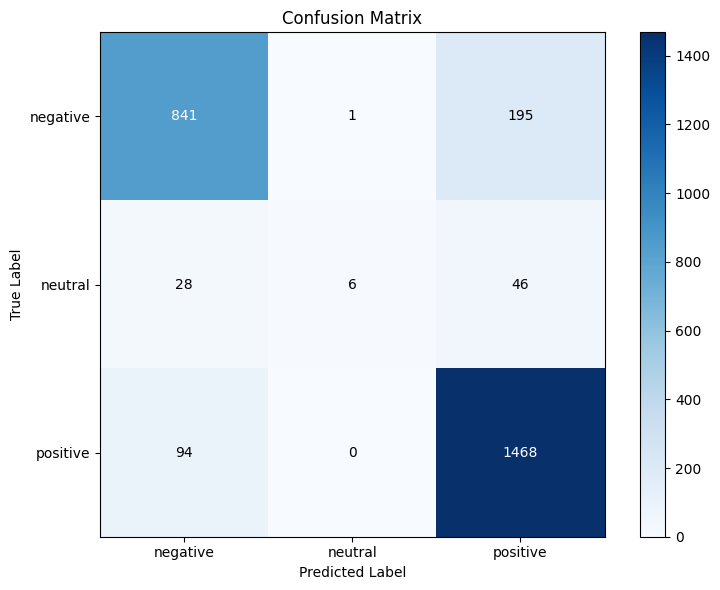

In [347]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predLR_init)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

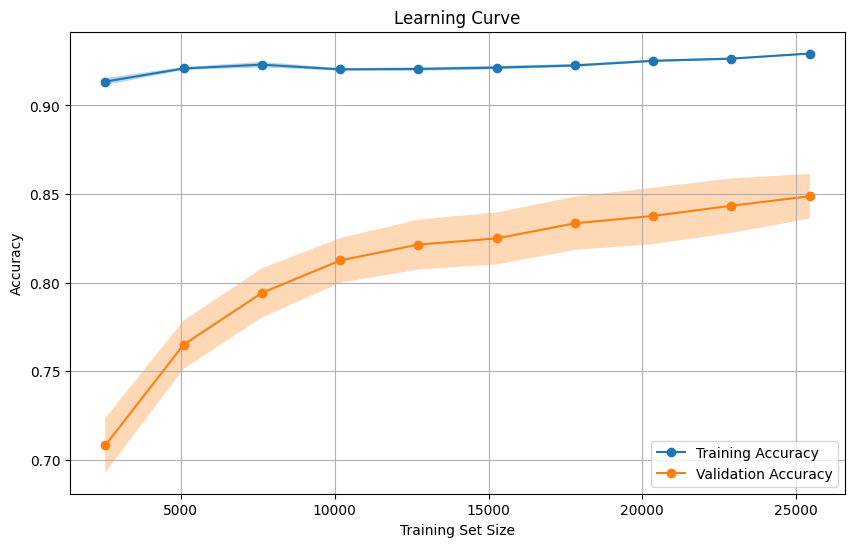

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    # Calculate mean and standard deviation of train scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation of test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.3)
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.3)
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Create an instance of LogisticRegression
modelLR = LogisticRegression(max_iter=10000)

# Plot the learning curve
plot_learning_curve(modelLR, X, y, cv=20, train_sizes=train_sizes)